In [27]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
#from kt_utils import *
import pandas as pd

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

In [28]:
noise = pd.read_csv('noise_classified.csv',header=None)
labels_noise= pd.read_csv("attribute_list.csv",skiprows=1)

In [29]:
labels_noise['noise']=noise.loc[:,1]



In [30]:
labels= labels_noise[labels_noise['noise']==1]


In [31]:
train_test_data_smiling=labels.loc[:,['file_name','smiling']]

In [32]:
train_test_data_smiling['smiling']= train_test_data_smiling['smiling'].apply(lambda x: 0 if x < 1  else 1)

In [33]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(train_test_data_smiling, test_size=0.4)
y_train= np.array(train['smiling'])
y_test=np.array(test['smiling'])
train.shape[0]
picture_shape=(64,64,3)

In [34]:
i=0
x_train=np.zeros((len(train['smiling']),64,64,3))
for x in list(train['file_name']):
    temp= image.load_img('./dataset/'+str(x)+'.png',target_size=(64, 64))
    x_train[i,:,:,:]=image.img_to_array(temp)
    i=i+1
i=0
x_test=np.zeros((len(test['smiling']),64,64,3))
for x in list(test['file_name']):
    temp= image.load_img('./dataset/'+str(x)+'.png',target_size=(64, 64))
    x_test[i,:,:,:]=image.img_to_array(temp)
    i=i+1
x_train,x_test = x_train/255,x_test/255

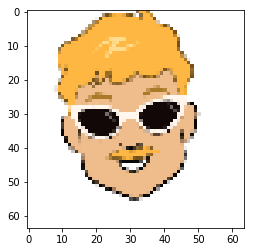

In [35]:
plt.imshow(x_test[9,:,:,:])

In [39]:
def HappyModel(input_shape):
    """
    Implementation of the HappyModel.
    
    Arguments:
    input_shape -- shape of the images of the dataset

    Returns:
    model -- a Model() instance in Keras
    """
    
    
    # Define the input placeholder as a tensor with shape input_shape. Think of this as your input image!
    X_input = Input(input_shape)

    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((3, 3))(X_input)

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (7, 7), strides = (2, 2), name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Dropout(.2)(X)
    X = Activation('relu')(X)
    

    # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool_1')(X)
    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (7, 7), strides = (, 1), name = 'conv1')(X)
    X = BatchNormalization(axis = 3, name = 'bn1')(X)
    X = Activation('relu')(X)
    X = Dropout(.2)(X)
    
    X = MaxPooling2D((2, 2), name='max_pool_2')(X)

    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(16, activation='relu', name='fc0')(X)
    X = Dense(8, activation='relu', name='fc1')(X)
    X = Dense(1, activation='sigmoid', name='fc2')(X)
    

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='HappyModel')

    return model

In [40]:

smilingmodel=HappyModel(x_train.shape[1:])
smilingmodel.compile(optimizer='adam',loss='binary_crossentropy',metrics = ["accuracy"])
smilingmodel.fit(x=x_train, y=y_train.T,epochs=5,batch_size=64)

Epoch 1/5
2652/2652 [==============================] - 95s 36ms/step - loss: 0.3566 - acc: 0.7775
Epoch 2/5
2652/2652 [==============================] - 94s 36ms/step - loss: 0.3187 - acc: 0.7934
Epoch 3/5
2652/2652 [==============================] - 92s 35ms/step - loss: 0.3146 - acc: 0.7934
Epoch 4/5
2652/2652 [==============================] - 99s 37ms/step - loss: 0.2931 - acc: 0.7934
Epoch 5/5
2652/2652 [==============================] - 93s 35ms/step - loss: 0.2333 - acc: 0.8842


In [41]:
smilingmodel.fit(x=x_train, y=y_train.T,epochs=5,batch_size=16)

Epoch 1/5
2652/2652 [==============================] - 105s 40ms/step - loss: 0.1997 - acc: 0.9050
Epoch 2/5
2652/2652 [==============================] - 110s 41ms/step - loss: 0.1583 - acc: 0.9257
Epoch 3/5
2652/2652 [==============================] - 102s 38ms/step - loss: 0.1262 - acc: 0.9416
Epoch 4/5
2652/2652 [==============================] - 114s 43ms/step - loss: 0.1152 - acc: 0.9525
Epoch 5/5
2652/2652 [==============================] - 96s 36ms/step - loss: 0.0946 - acc: 0.9627


In [44]:
smilingmodel.fit(x=x_train, y=y_train.T,epochs=3,batch_size=8)

Epoch 1/3
2652/2652 [==============================] - 93s 35ms/step - loss: 0.1288 - acc: 0.9465
Epoch 2/3
2652/2652 [==============================] - 98s 37ms/step - loss: 0.1007 - acc: 0.9612
Epoch 3/3
2652/2652 [==============================] - 109s 41ms/step - loss: 0.0771 - acc: 0.9713


In [45]:
preds = smilingmodel.evaluate(x =x_test, y =y_test.T)
### END CODE HERE ###
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

1768/1768 [==============================] - 23s 13ms/step

Loss = 0.8377006227883818
Test Accuracy = 0.8529411764705882


In [46]:
preds = smilingmodel.evaluate(x =x_test, y =y_test.T)
### END CODE HERE ###
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

1768/1768 [==============================] - 23s 13ms/step

Loss = 0.8377006227883818
Test Accuracy = 0.8529411764705882
